<a href="https://colab.research.google.com/github/kabbo12012000/Clustering-DimensionalityReduction/blob/main/Clustering_%26_Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [255]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from sklearn.decomposition import PCA
import plotly.express as px

In [256]:
iris= load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = pd.Series(data= iris['target'] , name='species')

In [257]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [258]:
df['target'].head(-5)

,target
0,0
1,0
2,0
3,0
4,0
...,...
140,2
141,2
142,2
143,2


In [259]:
X = df.drop('target',axis=1).values
y=df['target'].values

scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

In [260]:
fig = px.scatter(df)
fig.show()

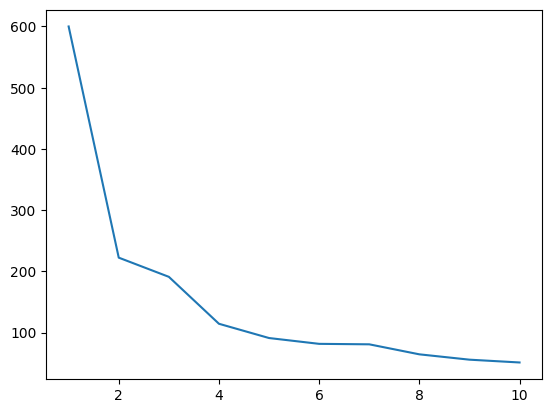

In [261]:
inertia =[]
K = range(1,11)
for k in K:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(x_scaled)
  inertia.append(kmeans.inertia_)
plt.plot(K,inertia)
plt.show()

In [262]:
kmeans_model = KMeans(n_clusters=3,random_state=42)
cluster1 = kmeans_model.fit_predict(x_scaled)

In [263]:
df['cluster'] = cluster1

In [264]:
fig = px.scatter(df, x='petal length (cm)', y='petal width (cm)', color='cluster', title='KMeans Clustering')
fig.show()

In [265]:
fig = px.scatter(df, x='sepal length (cm)', y='sepal width (cm)', color='cluster', title='KMeans Clustering (Sepal Length vs Sepal Width)')
fig.show()

In [266]:
fig = px.scatter_3d(df, x='sepal length (cm)', y='sepal width (cm)', z='petal length (cm)', color='cluster', title='KMeans Clustering (3D: Sepal Length, Sepal Width, Petal Length)')
fig.show()

In [267]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.72962445 0.22850762]


In [268]:
kmeans_model = KMeans(n_clusters=3,random_state=4)
cluster2 = kmeans_model.fit_predict(x_pca)
df['cluster'] = cluster2

In [269]:
fig = px.scatter(df, x='sepal length (cm)', y='sepal width (cm)', color='cluster', title='KMeans Clustering')
fig.show()

In [270]:
fig = px.scatter(df, x='petal length (cm)', y='petal width (cm)', color='cluster', title='KMeans Clustering')
fig.show()

In [271]:
fig = px.scatter_3d(df, x='petal length (cm)', y='petal width (cm)', z='sepal length (cm)', color='cluster', title='KMeans')
fig.show()

In [272]:
fig = px.scatter_3d(df, x='sepal length (cm)', y='sepal width (cm)', z='petal length (cm)', color='cluster', title='KMeans')
fig.show()

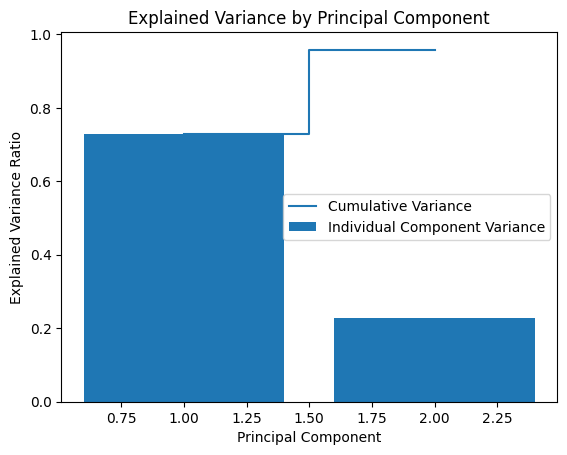

In [273]:
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, label="Individual Component Variance")
plt.step(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), where="mid", label="Cumulative Variance")
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Component')
plt.legend()
plt.show()

In [274]:
from sklearn.metrics import accuracy_score, confusion_matrix
print("Confusion Matrix (Original Data):")
print(confusion_matrix(y, cluster1), "\n")

print("Confusion Matrix (PCA-Reduced Data):")
print(confusion_matrix(y, cluster2), "\n")

Confusion Matrix (Original Data):
[[ 0 33 17]
 [46  0  4]
 [50  0  0]] 

Confusion Matrix (PCA-Reduced Data):
[[ 0 50  0]
 [11  0 39]
 [34  0 16]] 



In [275]:
linkage = linkage(x_pca, method='ward')

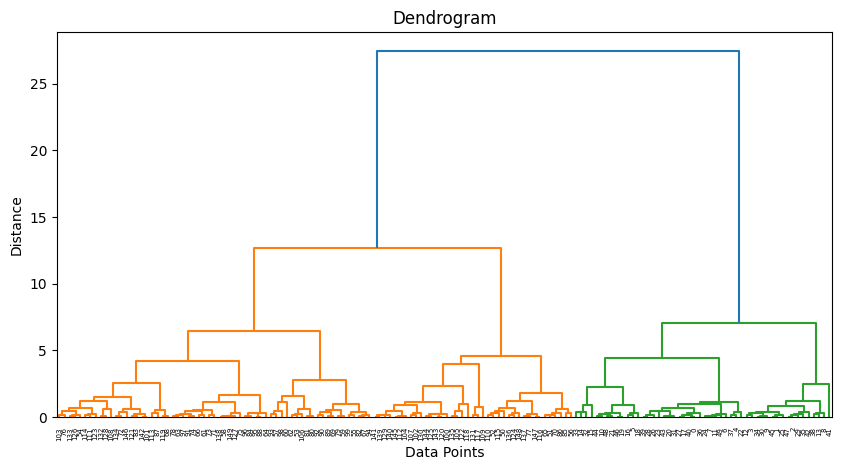

In [276]:

plt.figure(figsize=(10, 5))
dendrogram(linkage, orientation='top',distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [277]:
hc_cluster = fcluster(linkage, t=3, criterion='maxclust')

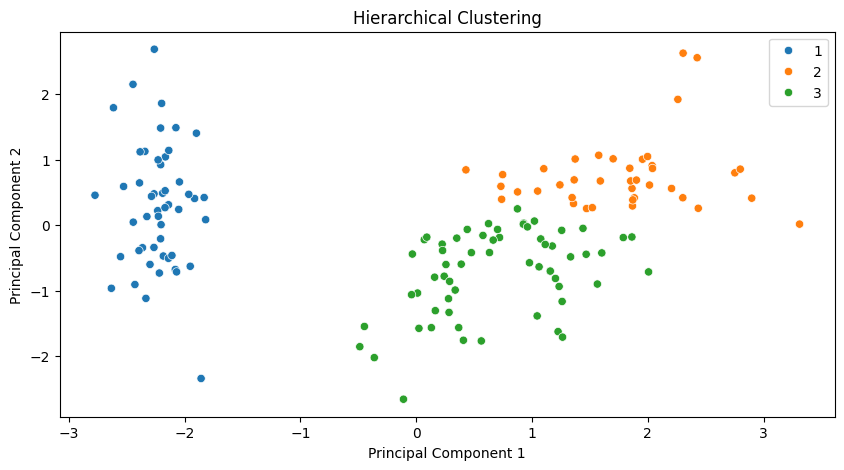

In [278]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 1], hue=hc_cluster, palette='tab10')
plt.title('Hierarchical Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [279]:
print("Confusion Matrix (Original Data):")
print(confusion_matrix(y, cluster1), "\n")

print("Confusion Matrix (HC Data):")
print(confusion_matrix(y, hc_cluster), "\n")

Confusion Matrix (Original Data):
[[ 0 33 17]
 [46  0  4]
 [50  0  0]] 

Confusion Matrix (HC Data):
[[ 0 50  0  0]
 [ 0  0  9 41]
 [ 0  0 30 20]
 [ 0  0  0  0]] 



In [282]:
db = DBSCAN(eps=0.5, min_samples=5)
db_cluster = db.fit_predict(x_pca)

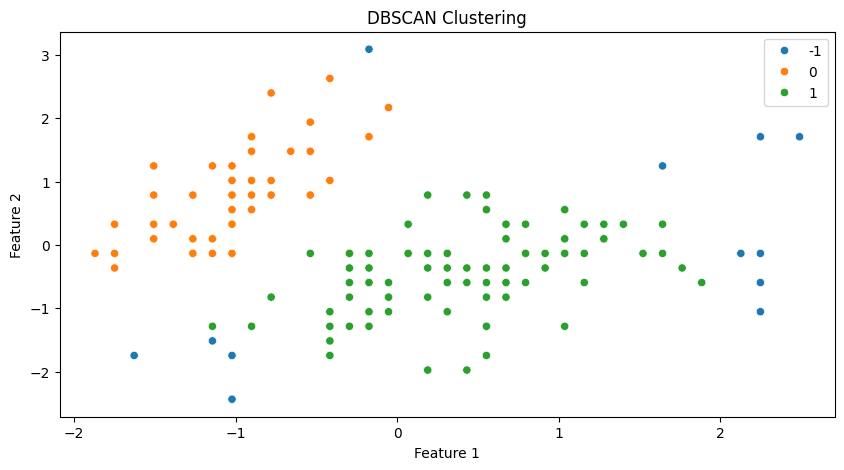

In [283]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=x_scaled[:, 0], y=x_scaled[:, 1], hue=db_cluster , palette='tab10')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [284]:
print("Confusion Matrix (Original Data):")
print(confusion_matrix(y, db_cluster))

Confusion Matrix (Original Data):
[[ 0  0  0  0]
 [ 2 48  0  0]
 [ 3  0 47  0]
 [ 7  0 43  0]]


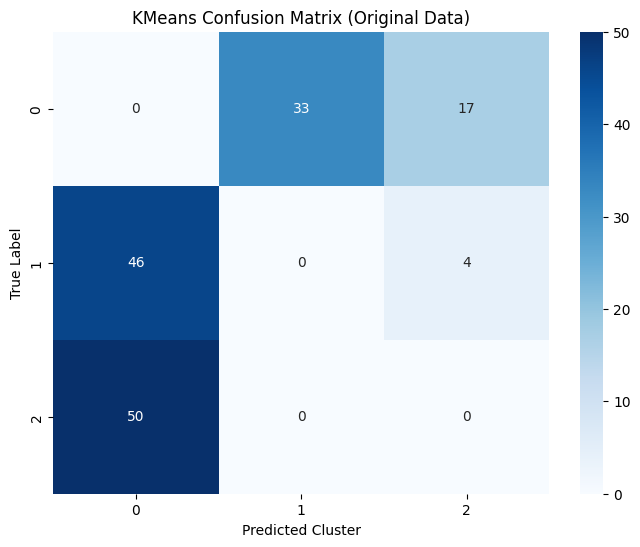

In [285]:
cm_original = confusion_matrix(y, cluster1)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_original, annot=True, fmt='d', cmap='Blues')
plt.title('KMeans Confusion Matrix (Original Data)')
plt.xlabel('Predicted Cluster')
plt.ylabel('True Label')
plt.show()

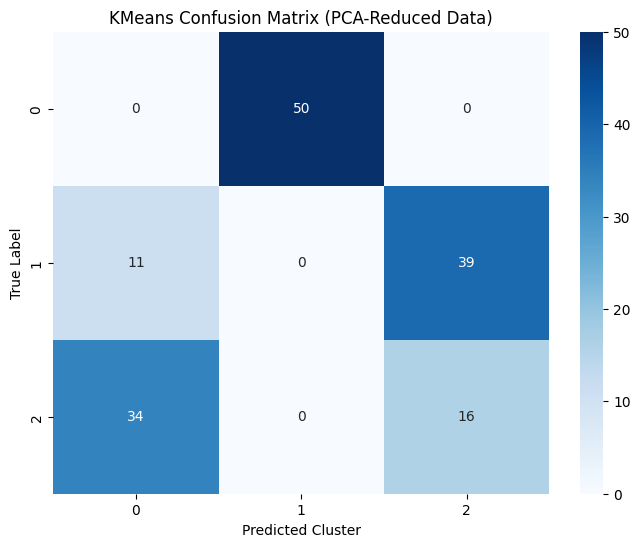

In [286]:
cm_pca = confusion_matrix(y, cluster2)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_pca, annot=True, fmt='d', cmap='Blues')
plt.title('KMeans Confusion Matrix (PCA-Reduced Data)')
plt.xlabel('Predicted Cluster')
plt.ylabel('True Label')
plt.show()

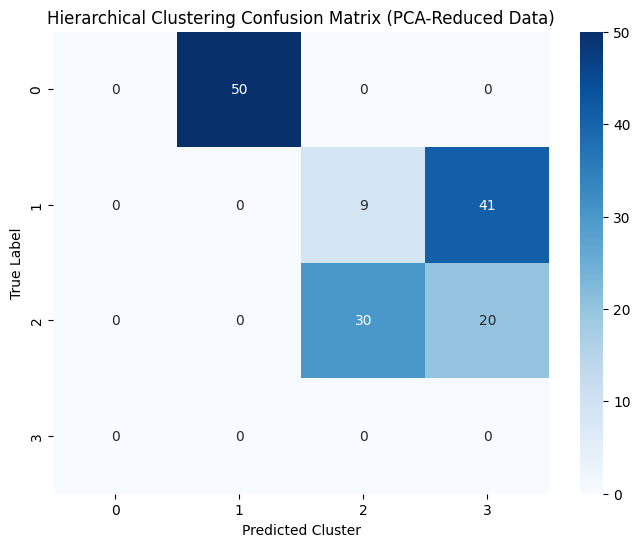

In [287]:
cm_hc = confusion_matrix(y, hc_cluster)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_hc, annot=True, fmt='d', cmap='Blues')
plt.title('Hierarchical Clustering Confusion Matrix (PCA-Reduced Data)')
plt.xlabel('Predicted Cluster')
plt.ylabel('True Label')
plt.show()

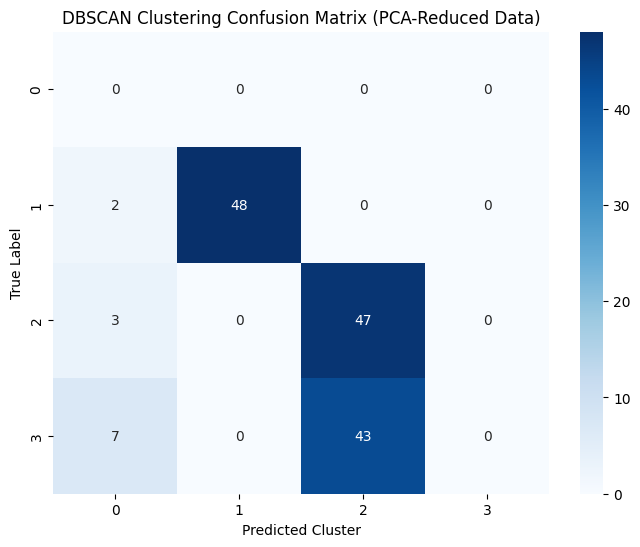

In [288]:
cm_dbscan = confusion_matrix(y, db_cluster)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dbscan, annot=True, fmt='d', cmap='Blues')
plt.title('DBSCAN Clustering Confusion Matrix (PCA-Reduced Data)')
plt.xlabel('Predicted Cluster')
plt.ylabel('True Label')
plt.show()